In [1]:
## using the kernelized SVM on diffrent datasets

In [3]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples =100, n_features =2, centers =8, cluster_std = 1.3, random_state = 4)

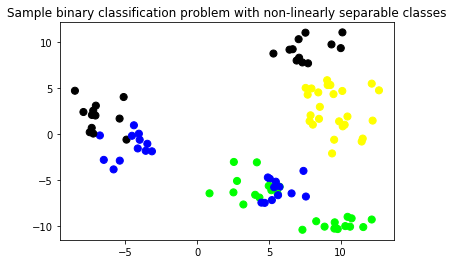

In [10]:
# plotting the fig.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=Y,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


In [12]:
## Classification using simple Kernelized SVM
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state = 0)

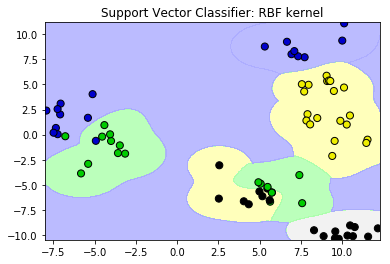

In [27]:
# The default SVC kernel is radial basis function (RBF)
from sklearn.svm import SVC
clf = SVC()
from adspy_shared_utilities import plot_class_regions_for_classifier
plot_class_regions_for_classifier(clf.fit(X_train, Y_train),
                                 X_train, Y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

In [28]:
# accuracy on the training dataset
clf.score(X_train,Y_train)

0.92000000000000004

In [29]:
# accuracy on the testing dataset
clf.score(X_test, Y_test)

0.71999999999999997

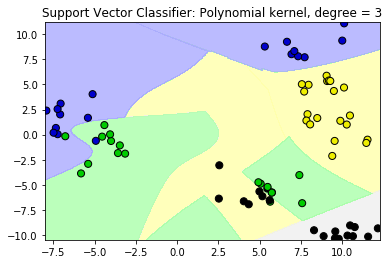

In [31]:
# Compare decision boundries with polynomial kernel, degree = 3
clf1 = SVC(kernel = 'poly', degree = 3)
plot_class_regions_for_classifier(clf1.fit(X_train, Y_train), X_train,
                                 Y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

In [32]:
# accuracy score on the training dataset
clf1.score(X_train, Y_train)

0.93333333333333335

In [33]:
# accuracy score on the testing dataset
clf1.score(X_test, Y_test)

0.71999999999999997

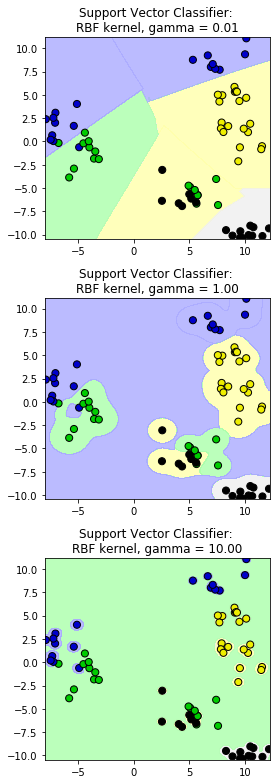

In [35]:
# Support Vector Machine with RBF kernel: gamma parameter
import matplotlib.pyplot as plt
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, Y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, Y_train,
                                             None, None, title, subplot)
    plt.tight_layout()
plt.show()

In [41]:
## apply kernalized SVM model on the breast_cancer datset

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [49]:
# splitting the dataset into training and testing datasets
X, Y = load_breast_cancer(return_X_y = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state =0)

In [50]:
# apply the SVM
from sklearn.svm import SVC
clf = SVC(C = 10)

In [51]:
# fitting the model
clf.fit(X_train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
# accuracy score on the training dataset
clf.score(X_train, Y_train)

1.0

In [53]:
# accuracy score on the testing dataset
clf.score(X_test, Y_test)

0.62937062937062938

In [54]:
#3 apply the MinMax Scaler feature 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
# transform dataset
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [60]:
# apply classifier
clf = SVC(C=10)
clf.fit(X_train_scaled, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
## accuracy on the training dataset
clf.score(X_train_scaled, Y_train)

0.97652582159624413

In [62]:
## accuracy score on the testing dataset
clf.score(X_test_scaled, Y_test)

0.95804195804195802